In [3]:
install.packages("readxl")

package 'readxl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpmyQ9i7\downloaded_packages


In [30]:
install.packages("magrittr")

package 'magrittr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\admin\AppData\Local\Temp\RtmpmyQ9i7\downloaded_packages


In [189]:
library("dplyr")

In [66]:
library("magrittr")

In [4]:
library("readxl")

Warning message:
"package 'readxl' was built under R version 3.6.3"

In [33]:
df <- data.frame(sex = c("M","F",NA,"M","F"),
                score = c(5,4,3,4,NA))
df

sex,score
M,5
F,4
NA,3
M,4
F,NA


결측치 확인하기

In [34]:
is.na(df) # 결측치 확인

sex,score
FALSE,FALSE
FALSE,FALSE
TRUE,FALSE
FALSE,FALSE
FALSE,TRUE


In [35]:
table(is.na(df)) # 결측치 빈도 출력


FALSE  TRUE 
    8     2 

In [36]:
table(is.na(df$score)) # score 결측치 빈도 확인


FALSE  TRUE 
    4     1 

In [75]:
df %>% filter(!is.na(score)) # score 결측치 제거 

sex,score
M,5
F,4
NA,3
M,4


In [76]:
# 여러 변수 동시에 결측치 없는 데이터 추출하기 
# score, sex 결측치 제외 
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex))
df_nomiss

sex,score
M,5
F,4
M,4


In [77]:
# 함수의 결측치 제외 기능 이용하기 - na.rm = T
mean(df$score, na.rm = T) # 결측치 제외하고 평균 산출 

[1] 4

In [78]:
sum(df$score, na.rm = T) # 결측치 제외하고 합계 산출 

[1] 16

In [79]:
# summarise() 에서 na.rm = T 사용하기 

In [80]:
# 결측치 생성 
exam <- read.csv('./Data/csv_exam.csv')
exam[c(3,8,15), "math"] <- NA  # 3,8,15 행의 math 에 NA 할당 

In [81]:
exam

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,NA,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,NA,78,25
9,3,20,98,15
10,3,50,98,45


In [82]:
# 평균 구하기 d
exam %>% summarise(mean_math = mean(math, na.rm=T)) # 결측치 제외하고 평균 산출 

mean_math
55.23529


결측치 대체하기
- 결측치 많을 경우 모두 제외하면 데이터 손실 큼
- 대안 : 다른 값 채워넣기 

결측치 대체법
- 대표값(평균,최빈값 등)으로 일괄 대체
- 통계분석 기법 적용, 예측값 추정해서 대체 

In [83]:
# 평균으로 대체하기
exam$math <- ifelse(is.na(exam$math), 55, exam$math) # math 가 NA 면 55 로 대체 
table(is.na(exam$math)) # 결측치 빈도표 생성


FALSE 
   20 

In [84]:
mean(exam$math) # math 평균 산출 

[1] 55.2

In [85]:
# 혼자서 해보기 

mpg <- as.data.frame(ggplot2::mpg)
head(mpg,15)
mpg[c(3,8,15,20), "hwy"] <- NA 

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [86]:
table(is.na(mpg$drv))
table(is.na(mpg$hwy))


FALSE 
  234 


FALSE  TRUE 
  230     4 

In [87]:
mpg %>% 
filter(!is.na(hwy)) %>% 
group_by(drv) %>% 
summarise(mean_hwy = mean(hwy))

drv,mean_hwy
4,19.04950
f,28.13333
r,21.25000


# 이상치 정제하기 

In [88]:
# 이상치 포함된 데이터 생성 - sex 3, score 6

outlier <- data.frame(sex = c(1,2,1,3,2,1),
                     score = c(5,4,3,4,2,6))
outlier

sex,score
1,5
2,4
1,3
3,4
2,2
1,6


In [89]:
# 이상치 확인하기
table(outlier$sex)


1 2 3 
3 2 1 

In [90]:
table(outlier$score)


2 3 4 5 6 
1 1 2 1 1 

In [91]:
# 결측 처리하기 - sex 
# sex 가 3 이면 NA 할당 
outlier$sex <- ifelse(outlier$sex == 3, NA, outlier$sex)
outlier

sex,score
1,5
2,4
1,3
NA,4
2,2
1,6


In [92]:
# 결측 처리하기 - score
# score 가 1~5 아니면 NA 할당 
outlier$score <- ifelse(outlier$score > 5, NA, outlier$score)
outlier 

sex,score
1,5
2,4
1,3
NA,4
2,2
1,NA


In [93]:
# 결측치 제외하고 분석 
outlier %>% 
filter(!is.na(sex)&!is.na(score)) %>% 
group_by(sex) %>% 
summarise(mean_score = mean(score)) 

sex,mean_score
1,4
2,3


이상치 제거하기 - 2. 극단적인 값 
- 정상범위 기준 정해서 벗어나면 결측 처리  
판단 기준 예  
논리적 판단 성인 몸무게 40kg~150kg 벗어나면 극단치  
통계적 판단 상하위 0.3% 극단치 또는 상자그림 1.5 IQR 벗어나면 극단치   

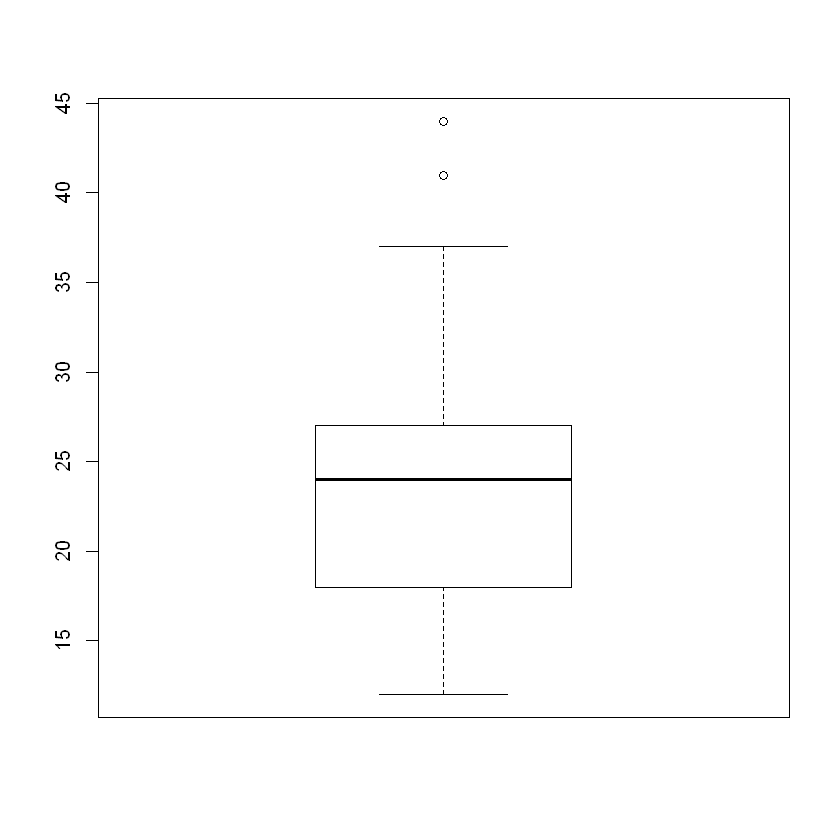

In [106]:
# 상자그림으로 극단치 기준 정해서 제거하기
# 상자그림 생성 
mpg <- as.data.frame(ggplot2::mpg)
boxplot(mpg$hwy)

[,1]
[1,]   12
[2,]   18
[3,]   24
[4,]   27
[5,]   37
attr(,"class")
        1 
"integer"

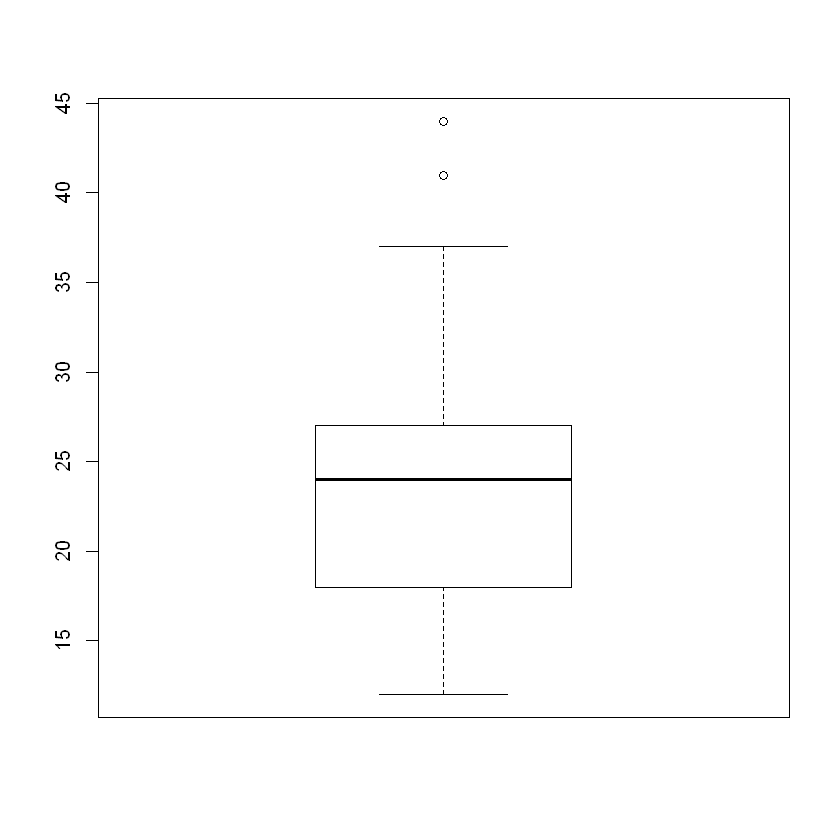

In [108]:
# 상자그림 통계치 뽑기 
(boxplot(mpg$hwy)$stats)

In [100]:
# 결측 처리하기
# 12 ~ 37 벗어나면 NA 할당 
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy)
table(is.na(mpg$hwy))


FALSE  TRUE 
  231     3 

In [103]:
# 결측치 제외하고 분석하기 
mpg %>%
group_by(drv) %>%
summarise(mean_hwy = mean(hwy, na.rm=T))

drv,mean_hwy
4,19.17476
f,27.72816
r,21.00000


In [109]:
# 혼자서 해보기 

mpg <- as.data.frame(ggplot2::mpg)
mpg[c(10,14,58,93), "drv"] <- "k" # drv 이상치 할당
mpg[c(29,43,129,203), "cty"] <- c(3,4,39,42) # cty 이상치 할당

In [116]:
mpg$drv

[1] "f" "f" "f" "f" "f" "f" "f" "4" "4" "k" "4" "4" "4" "k" "4" "4" "4" "4"
 [19] "r" "r" "r" "r" "r" "r" "r" "r" "r" "r" "4" "4" "4" "4" "f" "f" "f" "f"
 [37] "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "4" "4" "4" "4" "4" "4"
 [55] "4" "4" "4" "k" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4"
 [73] "4" "4" "r" "r" "r" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4"
 [91] "r" "r" "k" "r" "r" "r" "r" "r" "r" "f" "f" "f" "f" "f" "f" "f" "f" "f"
[109] "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "4" "4" "4" "4"
[127] "4" "4" "4" "4" "4" "4" "4" "4" "r" "r" "r" "4" "4" "4" "4" "f" "f" "f"
[145] "f" "f" "f" "f" "f" "f" "4" "4" "4" "4" "f" "f" "f" "f" "f" "4" "4" "4"
[163] "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "4" "f"
[181] "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f"
[199] "4" "4" "4" "4" "4" "4" "4" "4" "4" "f" "f" "f" "f" "f" "f" "f" "f" "f"
[217] "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f"

In [119]:
table(mpg$drv)


  4   f   k   r 
100 106   4  24 

In [131]:
mpg$drv <- ifelse(mpg$drv, %in% c("4","f","r", mpg$drv, NA)
mpg

ERROR: Error in parse(text = x, srcfile = src): <text>:1:28: 예기치 않은 SPECIAL입니다
1: mpg$drv <- ifelse(mpg$drv, %in%
                               ^


9
14
17
19
26


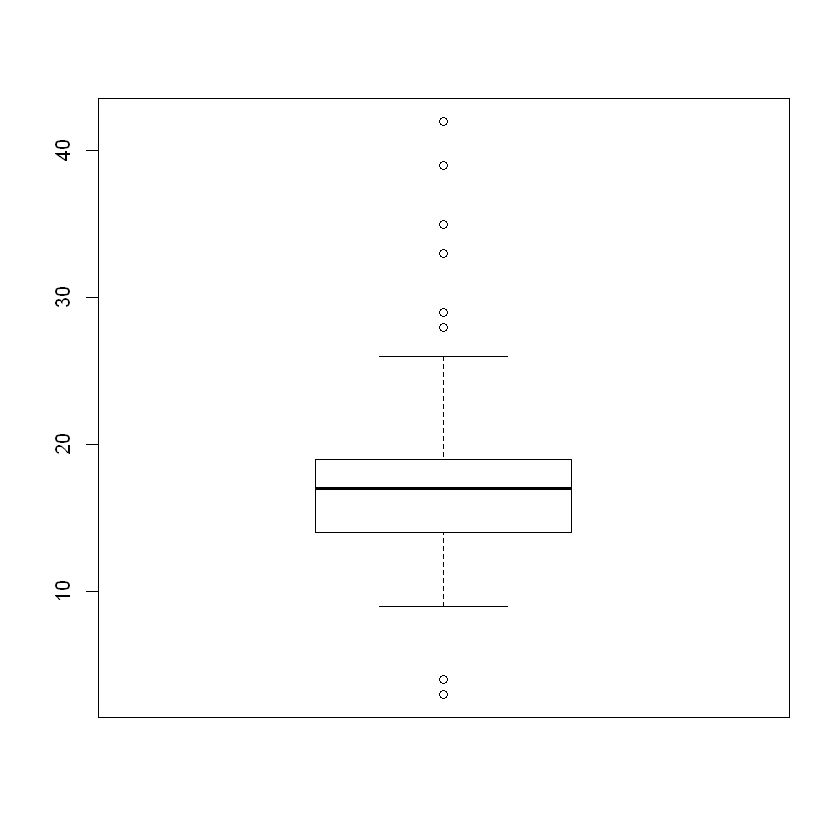

In [126]:
(boxplot(mpg$cty)$stats)

In [127]:
mpg$cty <- ifelse(mpg$cty < 9 | mpg$cty > 26, NA, mpg$cty)

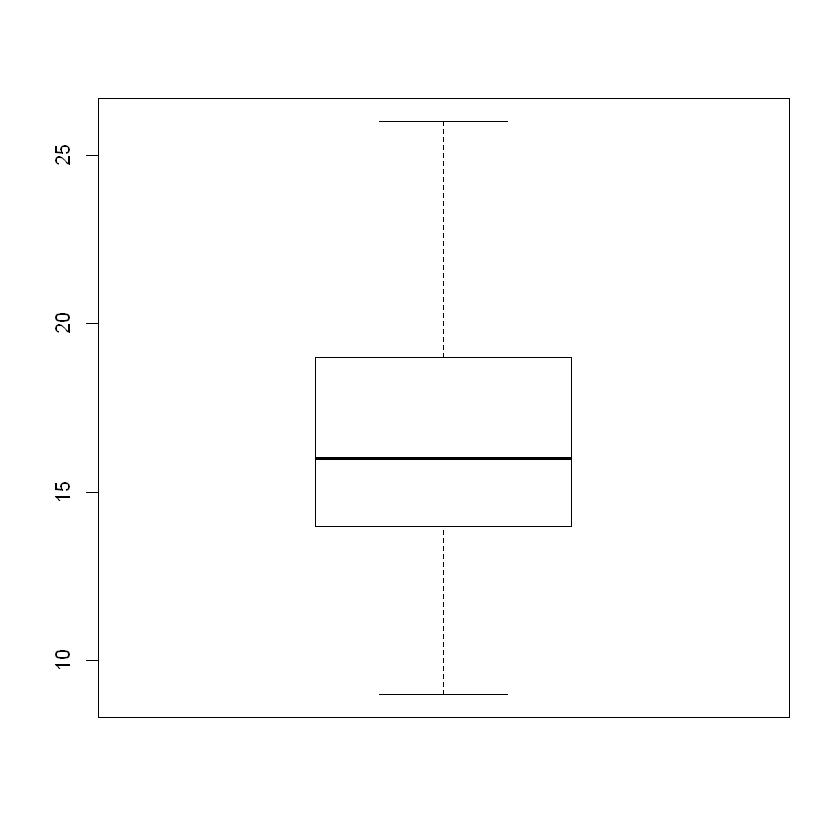

In [128]:
boxplot(mpg$cty)

# 정리하기

In [132]:
# 1. 결측치 정제하기

In [133]:
# 결측치 확인
table(is.na(df$score))


FALSE  TRUE 
    4     1 

In [134]:
# 결측치 제거 
df_nomiss <- df %>% filter(!is.na(score))

In [135]:
# 여러 변수 동시에 결측치 제거 
df_nomiss <- df %>% filter(!is.na(score) & !is.na(sex))

In [137]:
# 함수의 결측치 제외 기능 이용하기 
mean(df$score, na.rm = T)
exam %>% summarise(mean_math = mean(math, na.rm = T))

[1] 4

mean_math
55.2


In [138]:
# 2. 이상치 정제하기 

In [140]:
# 이상치 확인
table(outlier$sex)


1 2 
3 2 

In [141]:
# 결측 처리
outlier$sex <- ifelse(outlier$sex == 3, NA, outlier$sex)

[,1]
[1,]   20
[2,]   24
[3,]   26
[4,]   29
[5,]   36
attr(,"class")
        1 
"integer"

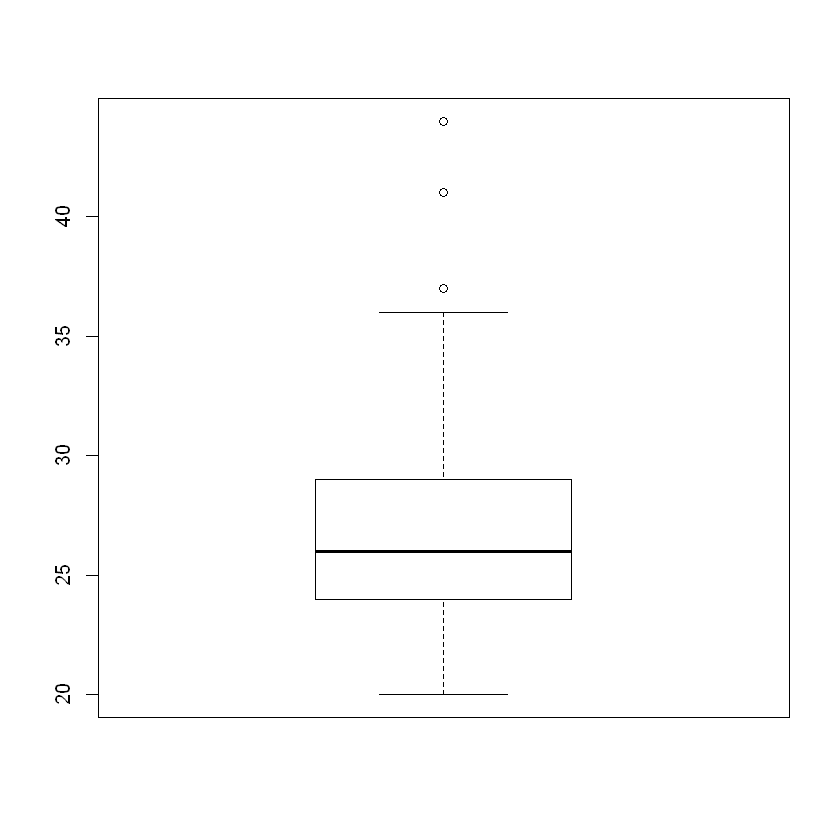

In [142]:
# boxplot 으로 극단치 기준 찾기 
boxplot(mpg$hwy)$stats

In [143]:
# 극단치 결측 처리 
mpg$hwy <- ifelse(mpg$hwy < 12 | mpg$hwy > 37, NA, mpg$hwy)

In [155]:
library(ggplot2)

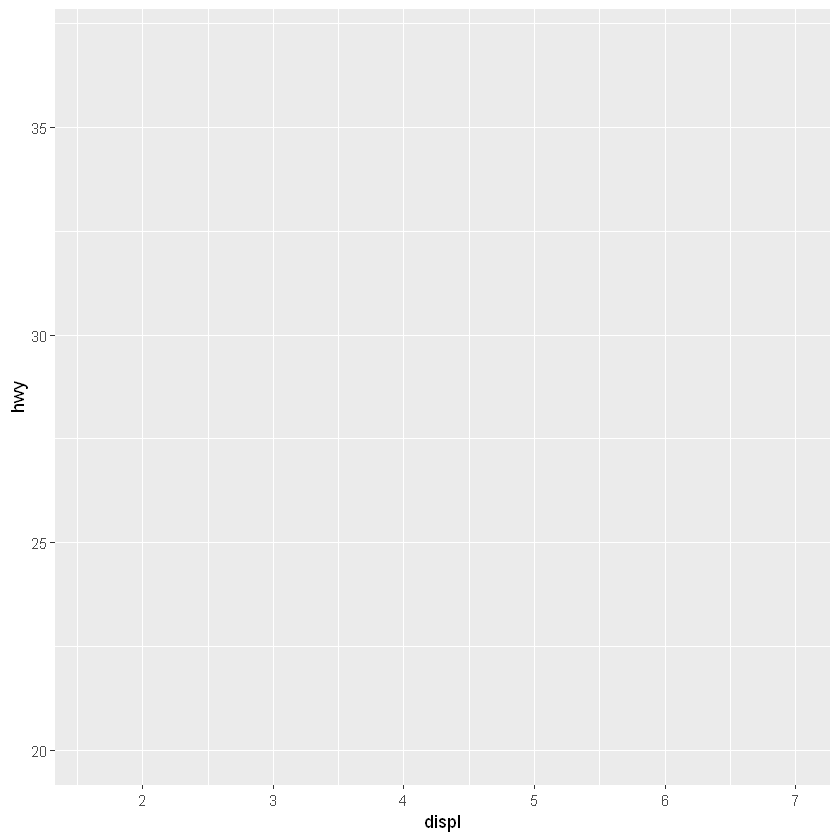

In [145]:
# 1. 배경 설정하기 
# x 축 displ, y 축 hwy 로 지정해 배경 생성 
ggplot(data = mpg, aes(x = displ, y = hwy))

Warning message:
"Removed 81 rows containing missing values (geom_point)."

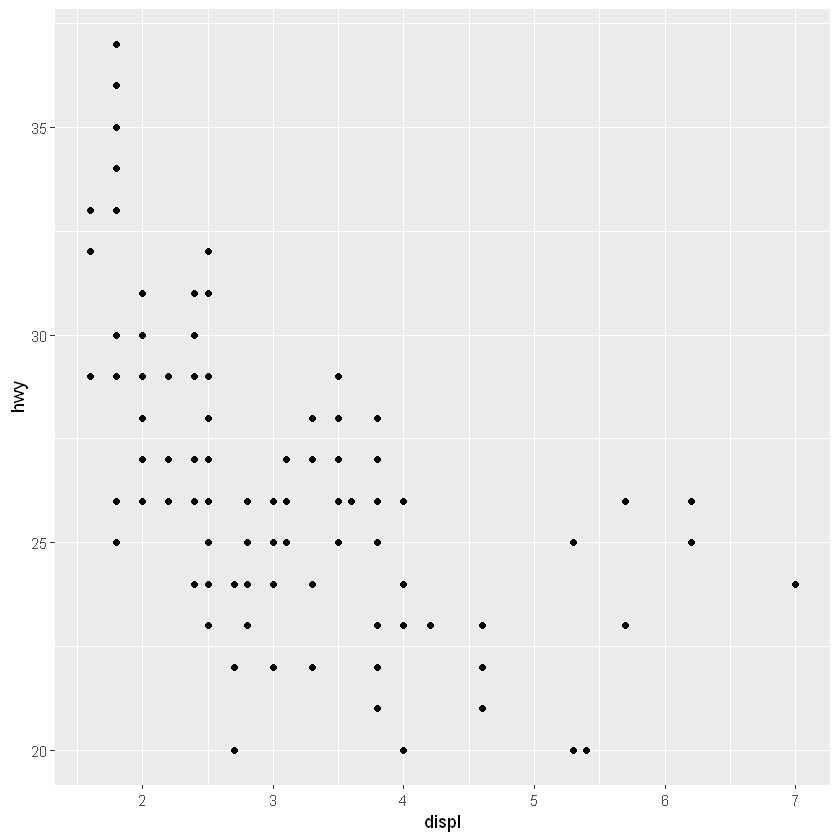

In [146]:
# 2. 그래프 추가하기 
# 배경에 산점도 추가 
ggplot(data = mpg, aes( x = displ, y = hwy)) + geom_point()

Warning message:
"Removed 181 rows containing missing values (geom_point)."

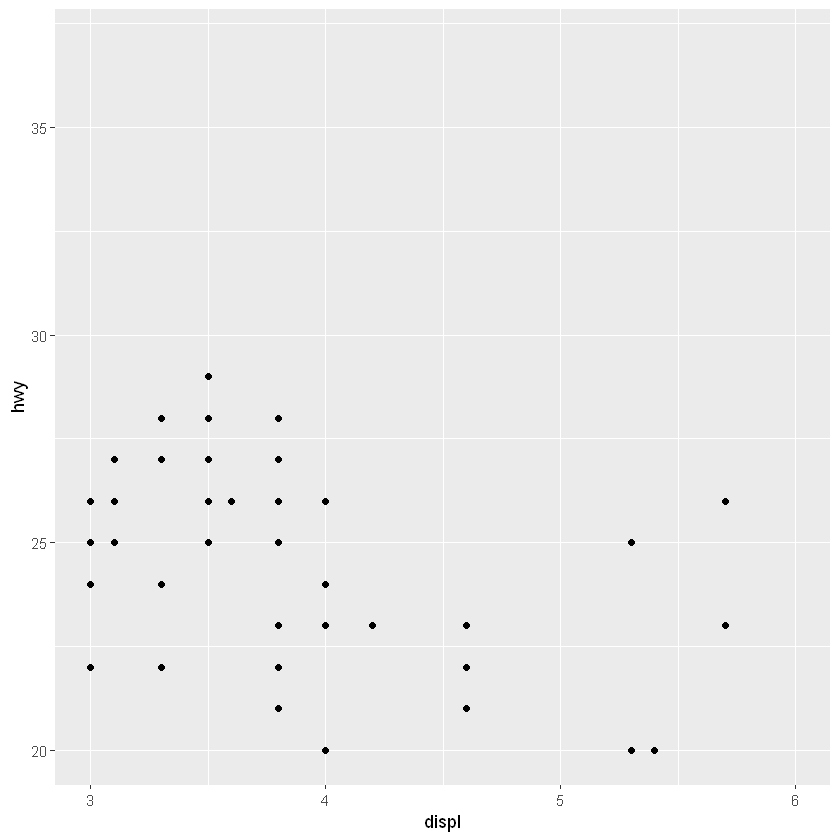

In [147]:
# 3. 축 범위를 조정하는 설정 추가 
# x 축 범위 3~6 으로 지정 
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3,6)

Warning message:
"Removed 181 rows containing missing values (geom_point)."

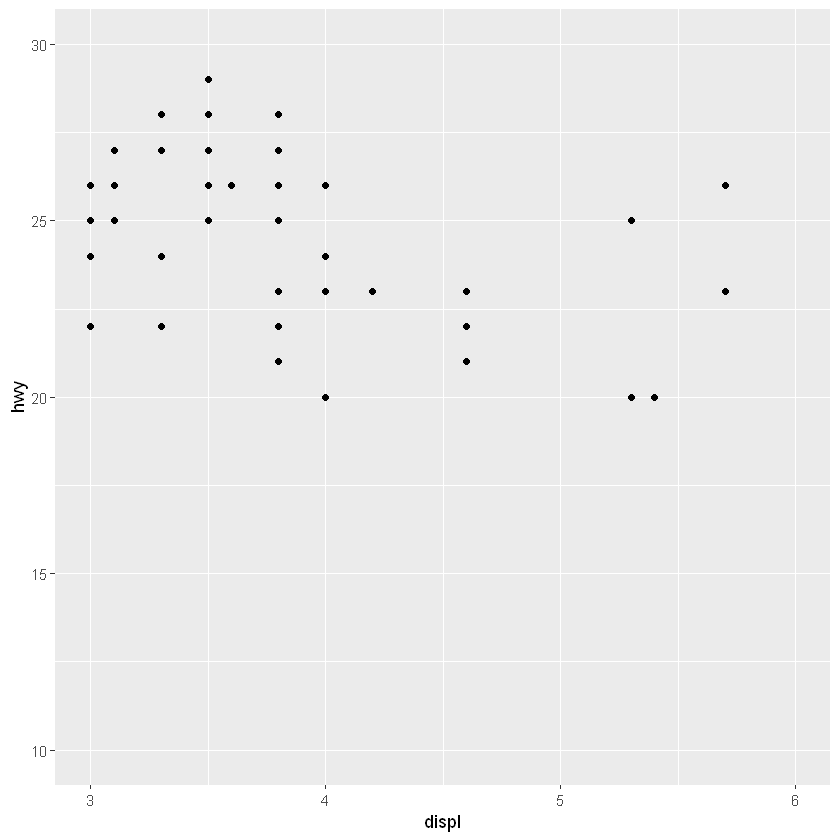

In [148]:
# ggplot2 코드 가독성 높이기 
# 한 줄로 작성 
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3,6) + ylim(10,30)

Warning message:
"Removed 181 rows containing missing values (geom_point)."

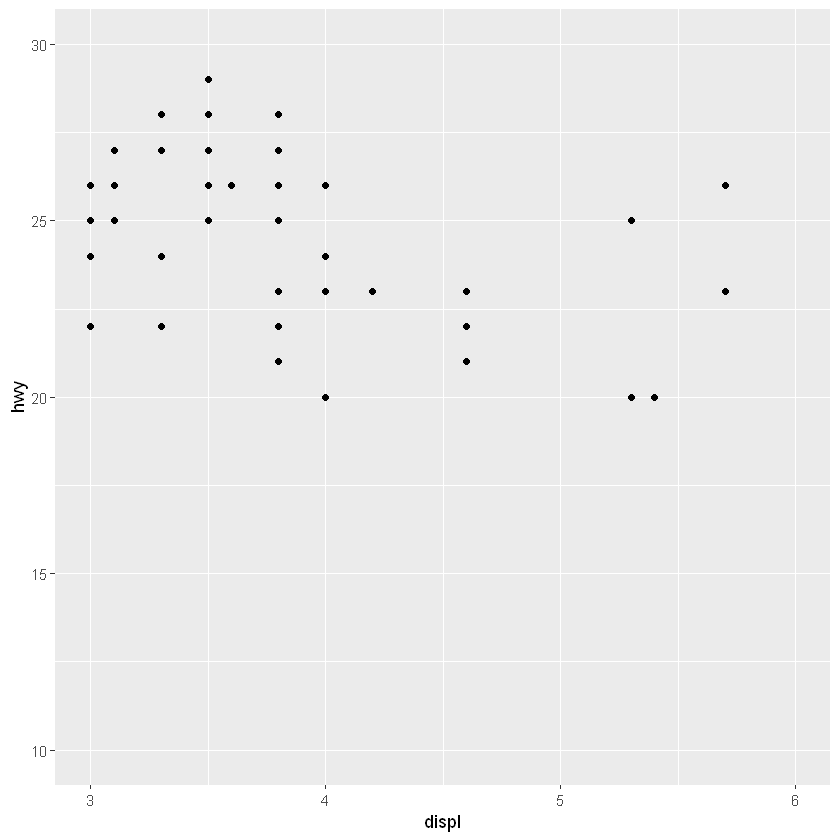

In [149]:
# + 뒤에서 줄 바꾸기
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point() + xlim(3,6) + ylim(10,30)

ggplot() vs qplot()
- qplot() : 전처리 단계 데이터 확인용. 문법 간단, 기능 단순 
- ggplot() : 최종 보고용. 색, 크기, 폰트 등 세부 조작 가능 

Warning message:
"Removed 85 rows containing missing values (geom_point)."

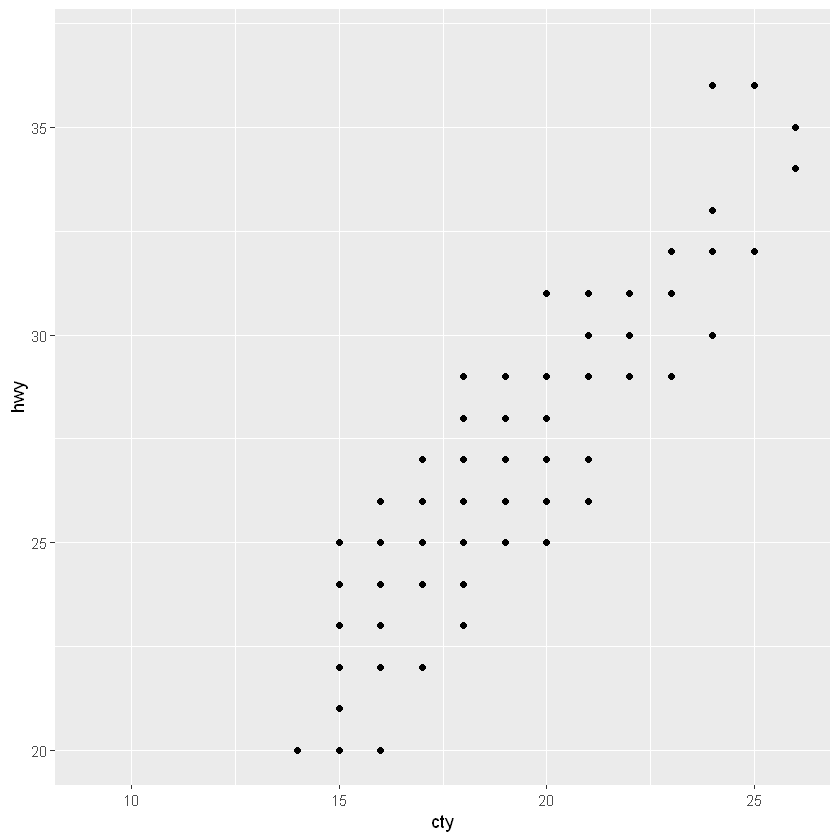

In [150]:
ggplot(data=mpg, aes(x=cty, y=hwy)) + geom_point()

Warning message:
"Removed 15 rows containing missing values (geom_point)."

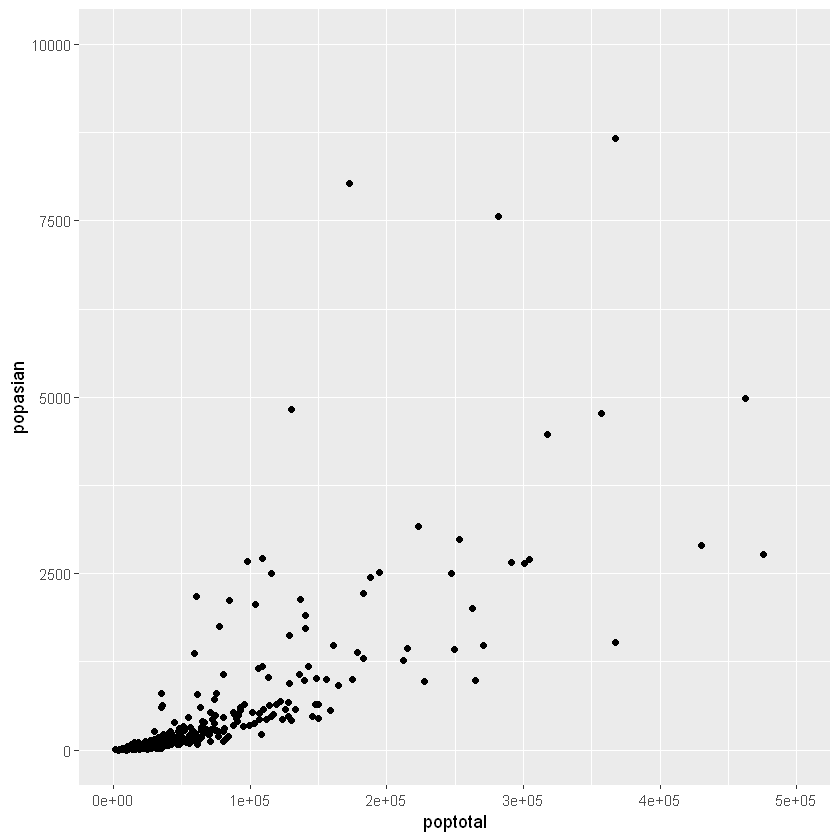

In [205]:
ggplot(data=midwest, aes(x=poptotal, y=popasian)) + geom_point() + xlim(0,500000) + ylim(0,10000)

참고  
• 10만 단위가 넘는 숫자는 지수 표기법(Exponential Notation)에 따라 표현됨  
• 1e+05 = 10만(1 × 10의 5승)  
• 정수로 표현하기 : options(scipen = 99) 실행 후 그래프 생성  
• 지수로 표현하기 : options(scipen = 0) 실행 후 그래프 생성  
• R 스튜디오 재실행시 옵션 원상 복구됨  

막대 그래프 - 집단 간 차이 표현하기 
- 막대 그래프(Bar Chart) : 데이터의 크기를 막대의 길이로 표현한 그래프  
- 성별 소득 차이처럼 집단 간 차이를 표현할 때 주로 사용 

In [170]:
mpg

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),k,20,28,p,compact


In [174]:
# 막대 그래프 1 - 평균 막대 그래프 만들기
# , 각 집단의 평균값을 막대 길이로 표현한 그래프
# 1. 집단별 평균표 만들기 
library(dplyr)
df_mpg <- mpg %>%
group_by(drv) %>%
summarise(mean_hwy = mean(hwy, na.rm=T))
df_mpg

drv,mean_hwy
4,23.84848
f,27.83333
k,26.33333
r,23.13333


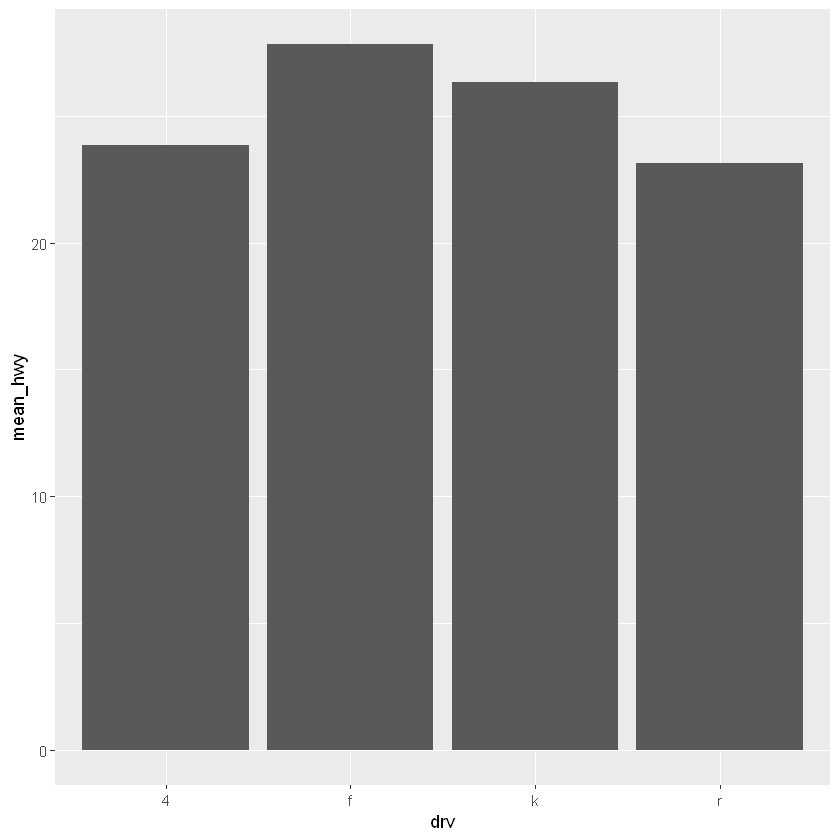

In [175]:
# 2. 그래프 생성하기 
ggplot(data = df_mpg, aes(x=drv, y=mean_hwy)) + geom_col()

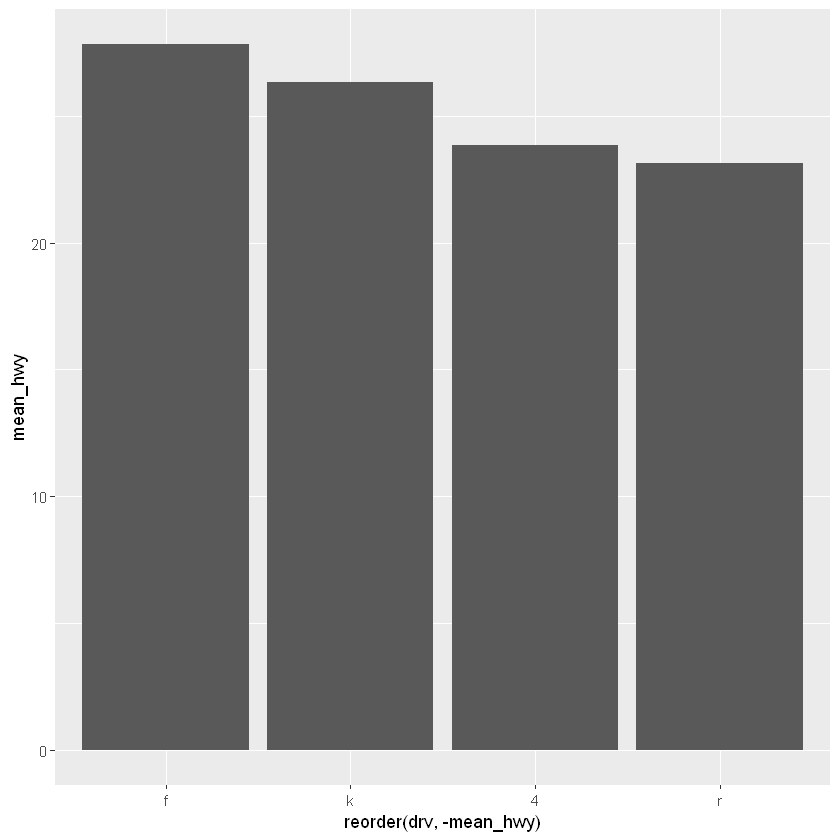

In [178]:
# 3. 크기 순으로 정렬하기
ggplot(data = df_mpg, aes(x=reorder(drv, -mean_hwy), y=mean_hwy)) + geom_col()

Warning message:
"Removed 81 rows containing non-finite values (stat_count)."

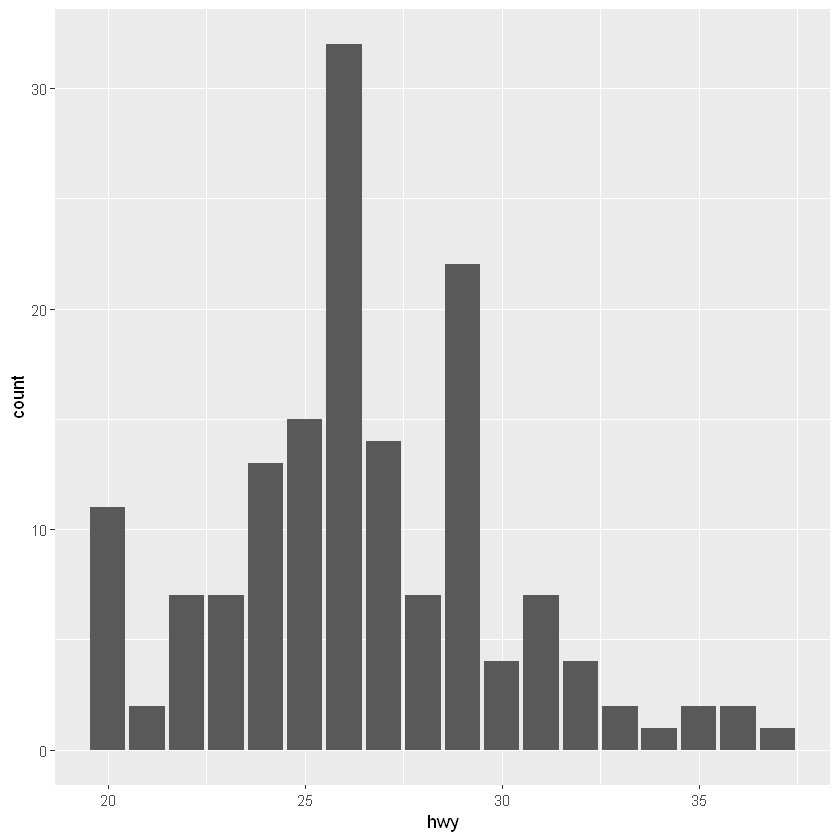

In [180]:
ggplot(data = mpg, aes(x=hwy)) + geom_bar()

geom_col() VS geom_bar()
- 평균 막대 그래프 : 데이터를 요약한 평균표를 먼저 만든 후 평균표를 이용해 그래프 생성  

- geom_col()
    - 빈도 막대 그래프 : 별도로 표를 만들지 않고 원자료를 이용해 바로 그래프 생성 
- geom_bar()

In [182]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


In [183]:
# 평균 표 생성 
df <- mpg %>% 
filter(class=="suv") %>%
group_by(manufacturer) %>% 
summarise(mean_cty = mean(cty)) %>%
arrange(desc(mean_cty)) %>% 
head(5)
df

manufacturer,mean_cty
subaru,18.83333
toyota,14.37500
nissan,13.75000
mercury,13.25000
ford,12.88889


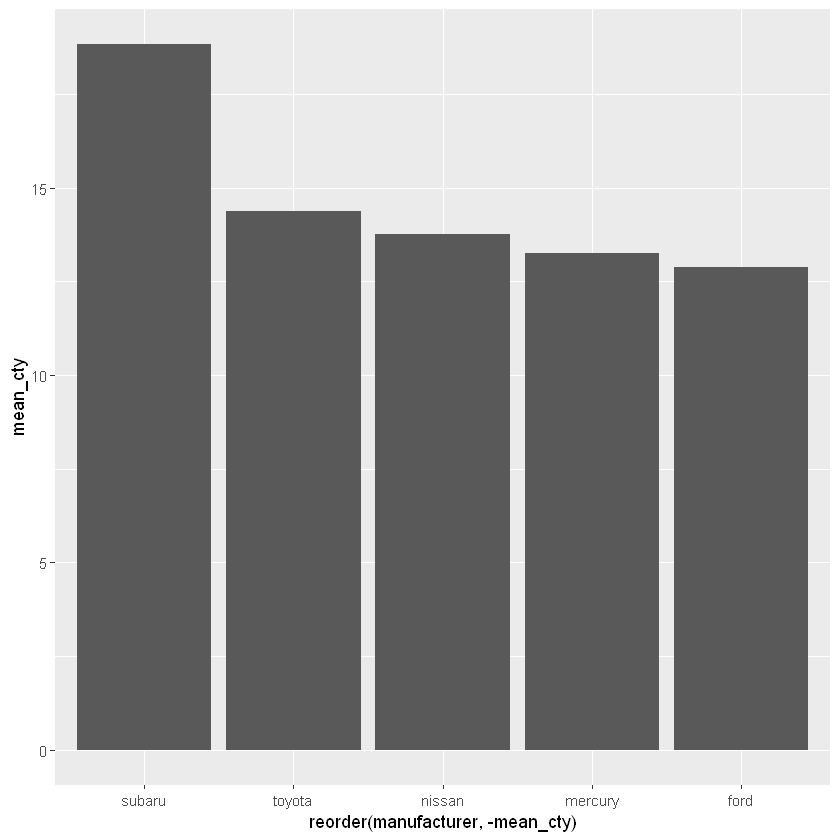

In [184]:
# 그래프 생성 
ggplot(data = df, aes(x=reorder(manufacturer, -mean_cty), y=mean_cty)) + geom_col()

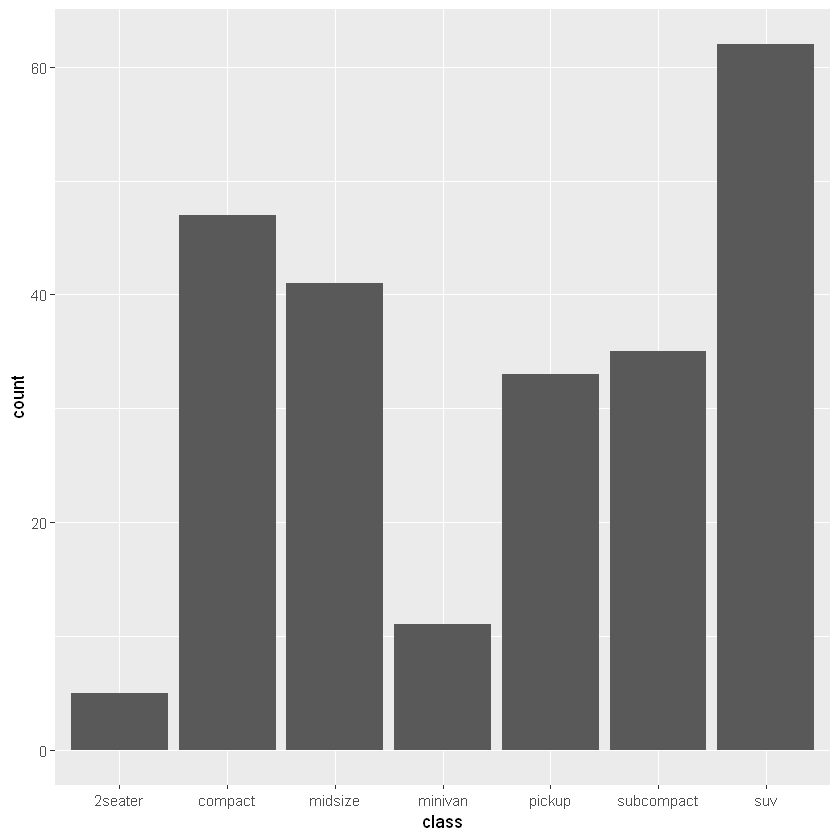

In [185]:
ggplot(data=mpg, aes(x=class)) + geom_bar()

In [197]:
head(economics)

date,pce,pop,psavert,uempmed,unemploy
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


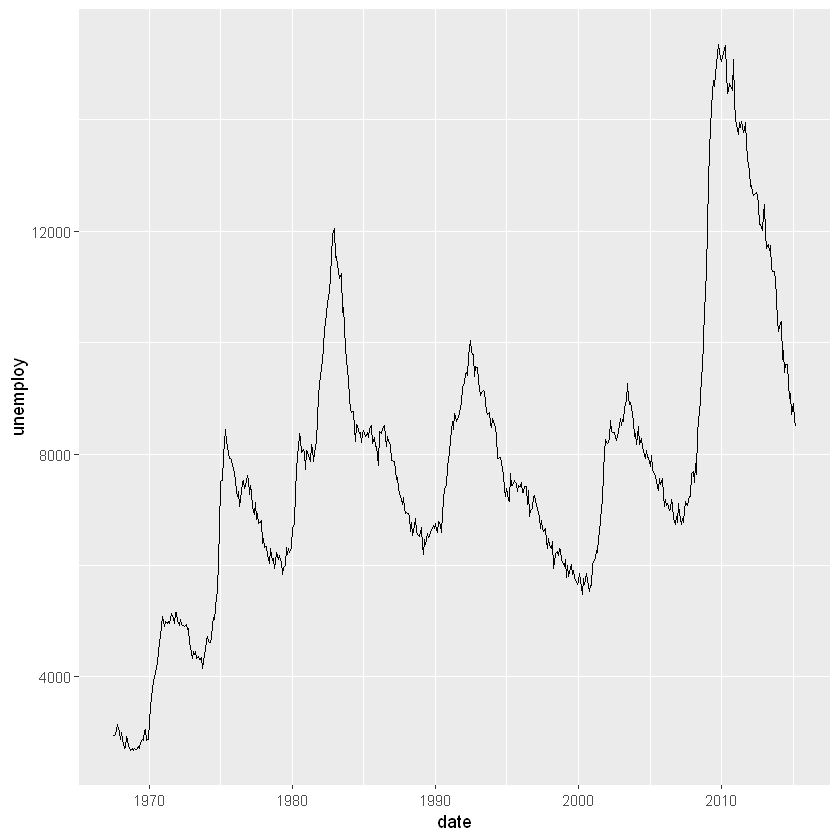

In [198]:
# 시계열 그래프 만들기 
ggplot(data=economics, aes(x=date, y=unemploy)) + geom_line()

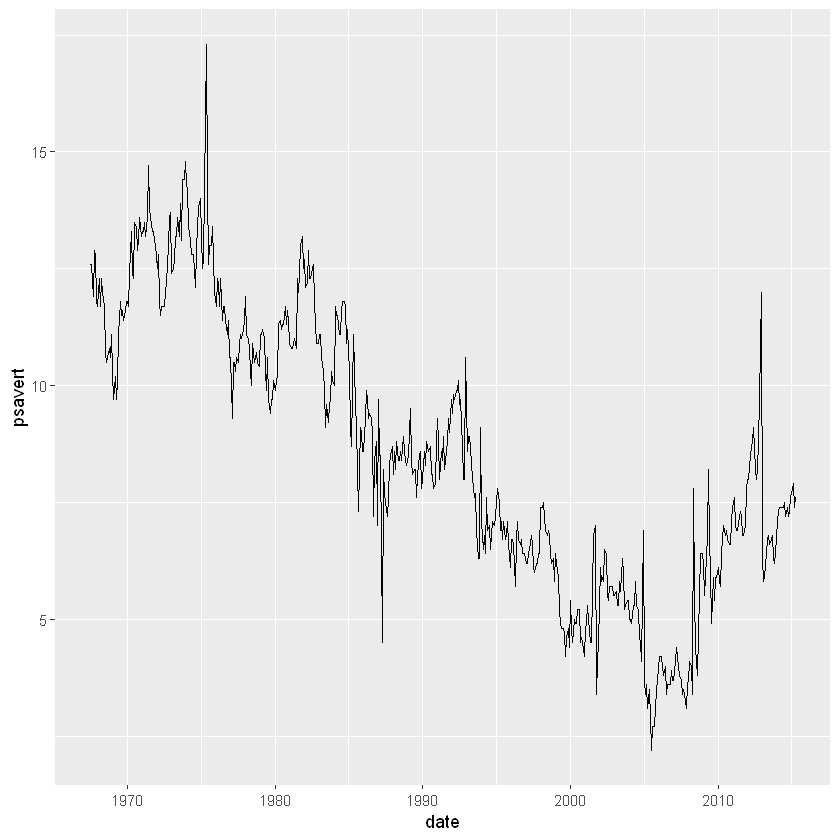

In [199]:
ggplot(data=economics, aes(x=date, y=psavert)) + geom_line()

Warning message:
"Removed 81 rows containing non-finite values (stat_boxplot)."

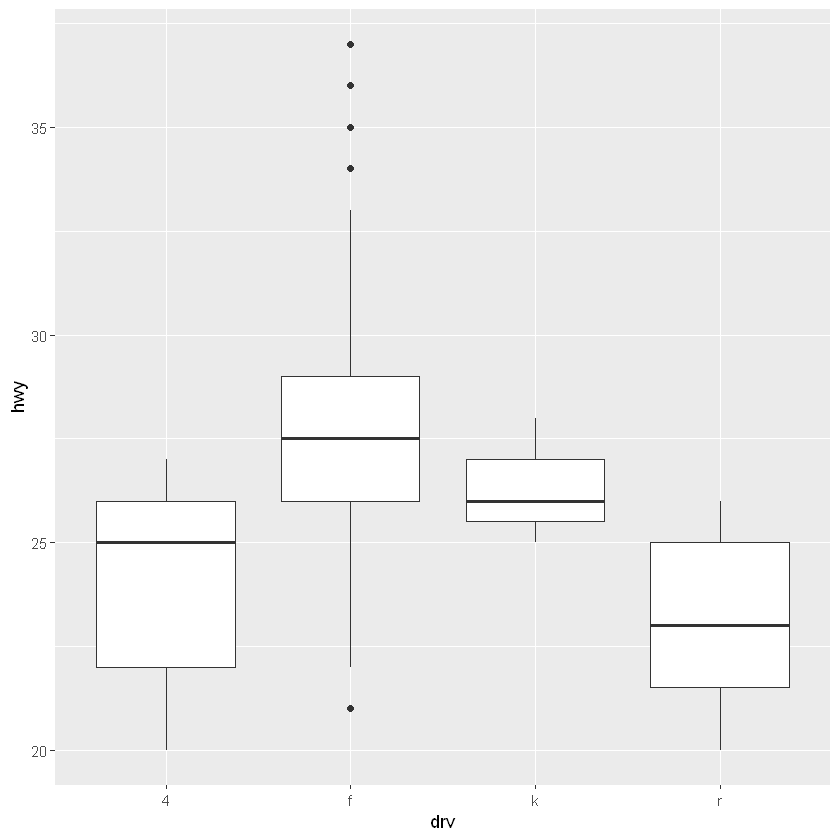

In [194]:
#상자 그림 만들기 
ggplot(data=mpg, aes(x=drv, y=hwy)) + geom_boxplot()

상자 그림 값 설명

상자 아래 세로선 아래 수염 하위 0~%25% 내에 해당하는 값  
상자 밑면 1사분위수(Q1) 하위 25% 위치 값  
상자 내 굵은 선 2사분위수(Q2) 하위 50% 위치 값(중앙값)  
상자 윗면 3사분위수(Q3) 하위 75% 위치 값  
상자 위 세로선 윗수염 하위 75~100% 내에 해당하는 값  
상자 밖 점 표식 극단치 Q1, Q3 밖 1.5 IQR을 벗어난 값  
참고 1.5 IQR: 사분위 범위(Q1~Q3간 거리)의 1.5배

앞에서 다룬 ggplot2 함수들   
값 내용   
geom_point() 산점도    
geom_col() 막대 그래프 - 요약표   
geom_bar() 막대 그래프 - 원자료   
geom_line() 선 그래프   
geom_boxplot() 상자 그림   

# 정리하기 

1.산점도  
ggplot(data = mpg, aes(x = displ, y = hwy)) + geom_point()  

# 축 설정 추가
ggplot(data = mpg, aes(x = displ, y = hwy)) +  
 geom_point() +  
 xlim(3, 6) +  
 ylim(10, 30)  
2.평균 막대 그래프  
1 단계.평균표 만들기  
df_mpg <- mpg %>%  
 group_by(drv) %>%    
 summarise(mean_hwy = mean(hwy))    
2 단계.그래프 생성하기, 크기순 정렬하기  
ggplot(data = df_mpg, aes(x = reorder(drv, -mean_hwy), y = mean_hwy)) + geom_col()  
3.빈도 막대 그래프  
ggplot(data = mpg, aes(x = drv)) + geom_bar()  
4.선 그래프  
ggplot(data = economics, aes(x = date, y = unemploy)) + geom_line()  
5.상자 그림  
ggplot(data = mpg, aes(x = drv, y = hwy)) + geom_boxplot()  